# Multi-Resolution Multi-Robot

Experiments for developing the code for this paper.

In [1]:
import sys
sys.path.append('..')

import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches
import textwrap

import numpy as np
from algorithms.mrmd.exploration_package import ExplorationPackage, ExplorationPackageSet
from algorithms.mrmd.epmarket import EPAgent, EPOffer, EPMarket
from path_generators import get_path_length


In [2]:
def visualize_path(pointlist, area=[], facecolor="yellow", use_arrows= False):

    """Visualize a path (specified as a list of waypoints) and a set of control points (which might have been part of the specification)
    :param area """
    fig, ax = plt.subplots(1,1, figsize=(5,5))
    ax.invert_xaxis()
    # plot the generated path
    xlim_min, xlim_max = np.min(pointlist[:,0])-2, np.max(pointlist[:,0])+2
    ylim_min, ylim_max = np.min(pointlist[:,1])-2, np.max(pointlist[:,1])+2
    ax.set_xlim(0, 100)
    ax.set_ylim(0, 100)

    # if specified, add the area, and extend the plot 
    if len(area) > 0:
        areapath = Path(area)        
        ax.add_patch(patches.PathPatch(areapath, fill=True, facecolor=facecolor))
        xlim_min, xlim_max = np.min(area[:,0])-2, np.max(area[:,0])+2
        ylim_min, ylim_max = np.min(area[:,1])-2, np.max(area[:,1])+2

    #ax.set_xlim(xlim_min, xlim_max)
    #ax.set_ylim(ylim_min, ylim_max)
    # add the trajectory
    if use_arrows == False:
        path = Path(pointlist)
        ax.add_patch(patches.PathPatch(path, fill=False))
    else:
        previous_point = None
        for point in pointlist:
            if previous_point is not None:
                ax.add_patch(patches.Arrow(previous_point[0], previous_point[1], point[0] - previous_point[0], point[1] - previous_point[1]))     
            previous_point = point   
    #plt.show()
    return ax


1821.1001238539702


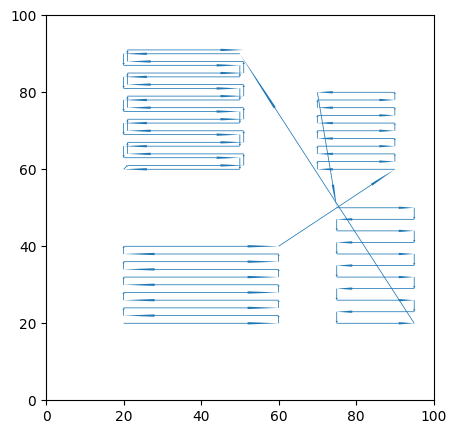

In [3]:
ep1 = ExplorationPackage(20, 60, 20, 40, 2)
path1 = ep1.lawnmower_horizontal_bottom_left()


ep2 = ExplorationPackage(70, 90, 60, 80, 2)
path2 = ep2.lawnmower_horizontal_bottom_right()

ep3 = ExplorationPackage(75, 95, 20, 50, 3)
path3 = ep3.lawnmower_horizontal_top_left()

ep4 = ExplorationPackage(20, 50, 60, 90, 3)
path4= ep4.lawnmower_horizontal_top_right()

path5 = ep4.lawnmower_horizontal_bottom_left(shift=[1,1])


#path = np.concatenate((path1, path2, path3, path4), axis=0)

path = np.concatenate((path1, path2, path3, path4, path5), axis=0)

print(get_path_length(path))

#print(path)
ax = visualize_path(path, use_arrows=True)
#plt.draw()
#plt.show()

### Trying out the exploration package set model

## EPMarket

From here: the implementation of a market of EPs and ExpPackPlanningAgents. This will be transferred to a regular python file. 

In [4]:
epm = EPMarket()

agentA = EPAgent("A")
epm.join(agentA)
print(epm)

agentB = EPAgent("B")
epm.join(agentB)

agentC = EPAgent("C")
epm.join(agentC)

# Agent A sends an offer O1, B and C bid on it, the market decides
# on C's favor (it meets the reserve)
# it becomes part of C's commitments and A's 
ep1 = ExplorationPackage(20, 60, 20, 40, 2)
epoff1 = agentA.offer(ep1, 50)

print(epm)
print(agentA)
print(epoff1)

agentB.bid(epoff1, 50)
agentC.bid(epoff1, 48)
epm.clearing() # this will call agentC.won

# Agent A sends an offer O2, nobody bids on it, the offer is cleared up both from the market and from A's outstanding offers
ep2 = ExplorationPackage(10, 20, 10, 20, 3)
epoff2 = agentA.offer(ep1, 10)
print(epm)
epm.clearing() # this will remove everything
print(epm)

# Agent C executes the offer. Pays the findings and receives the prize money.
agentC.commitment_executed(epoff1, 100)




EPMarket:
    Pending offers: []
    Accepted offers: []

EPMarket:
    Pending offers: [EPOffer: {   'assigned_to_name': None,
        'bid_prize': 50,
        'bids': {},
        'ep': ExplorationPackage x=[20,60] y=[20, 40] step=2,
        'executed': False,
        'offering_agent_name': 'A',
        'prize': 50,
        'real_value': 0}]
    Accepted offers: []

Agent: A
    Commitments: []
    Outstanding offers: {EPOffer: {   'assigned_to_name': None,
        'bid_prize': 50,
        'bids': {},
        'ep': ExplorationPackage x=[20,60] y=[20, 40] step=2,
        'executed': False,
        'offering_agent_name': 'A',
        'prize': 50,
        'real_value': 0}: EPOffer: {   'assigned_to_name': None,
        'bid_prize': 50,
        'bids': {},
        'ep': ExplorationPackage x=[20,60] y=[20, 40] step=2,
        'executed': False,
        'offering_agent_name': 'A',
        'prize': 50,
        'real_value': 0}}
    Outstanding bids: {}
    Agreed deals: []
    Terminated dea

In [5]:
results = {"x-code": 50, "value": 70}
results_nc = {}
for a in results:
    if not a.endswith("-code"):
        results_nc[a]=results[a]
print(results_nc)        

{'value': 70}
